# Written by Yixuan Tang
# for NYU CUSP PUI
### Assignment 1 Homework 7

In [2]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")
    
os.getenv("PUIDATA")

Populating the interactive namespace from numpy and matplotlib


'/Users/yixuantang/PUIdata/'

# IDEA:
## The post-90s are less likely than the pre-90s to choose biking _for commuting_

# NULL HYPOTHESIS:
## The proportion of pre-90s biking on weekends is the same or higher than the proportion of post-90s biking on weekends

_$H_0$ : $\frac{Po{\mathrm{weekend}}}{Po{\mathrm{total}}} <= \frac{Pr{\mathrm{weekend}}}{Pr_{\mathrm{total}}}$
_$H_1$ : $\frac{Po{\mathrm{weekend}}}{Po{\mathrm{total}}} > \frac{Pr{\mathrm{weekend}}}{Pr_{\mathrm{total}}}$

or identically:

_$H_0$ : $\frac{Po{\mathrm{weekend}}}{Po{\mathrm{total}}} - \frac{Pr{\mathrm{weekend}}}{Pr_{\mathrm{total}}} <= 0 $
_$H_1$ : $\frac{Po{\mathrm{weekend}}}{Po{\mathrm{total}}} - \frac{Pr{\mathrm{weekend}}}{Pr_{\mathrm{total}}} > 0$


## I choose the significance level  $\alpha=0.05$

#### which means I want the probability of getting a result at least as significant as mine to be less then 5%

## Starting with a single month of data:  reading data from citibike csv file from Jul 2017


### download and move  data to PUIDATA
# NOTE: 
# 1. access to data from within the notebook _is required_
# 2. if data is downloaded it _must_ be stored in a directory pointed to by the environmental variable PUIDATA

In [3]:
#download the data
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [6]:
datestring = '201607'
getCitiBikeCSV(datestring)

file in place, you can continue


In [7]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
df.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,704,7/1/2016 00:00:02,7/1/2016 00:11:47,459,W 20 St & 11 Ave,40.746745,-74.007756,347,Greenwich St & W Houston St,40.728846,-74.008591,17431,Customer,NaN,0,2016-07-01 00:00:02
1,492,7/1/2016 00:00:18,7/1/2016 00:08:31,293,Lafayette St & E 8 St,40.730287,-73.990765,466,W 25 St & 6 Ave,40.743954,-73.991449,24159,Subscriber,1984.0,1,2016-07-01 00:00:18
2,191,7/1/2016 00:00:19,7/1/2016 00:03:31,3090,N 8 St & Driggs Ave,40.717746,-73.956001,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,16345,Subscriber,1986.0,2,2016-07-01 00:00:19


In [8]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

In [9]:
data = df[['birth year', 'date']]

In [10]:
data.head(3)

,birth year,date
0,NaN,2016-07-01 00:00:02
1,1984.0,2016-07-01 00:00:18
2,1986.0,2016-07-01 00:00:19


### Lets separate post-90s (_po) from pre-90s (_pr) to test the hypotheses.
### In this csv file we have the birth year

### Lets plot the number of trips per week day

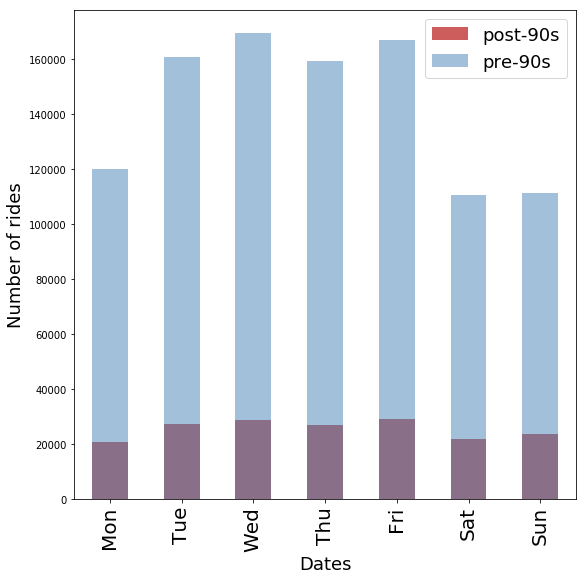

In [11]:
fig = pl.figure(figsize(9,9))
#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
norm_po = 1
((data['date'][data['birth year'] >= 1990].groupby([df['date'].dt.weekday]).count()) / norm_po).plot(kind="bar", 
                                                                                         color='IndianRed', 
                                                                                         label='post-90s')

norm_pr = 1
ax = ((data['date'][data['birth year'] < 1990].groupby([df['date'].dt.weekday]).count()) / norm_pr).plot(kind="bar", 
                                                                                              color='SteelBlue', 
                                                                                              alpha=0.5,
                                                                                              label='pre-90s')

tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
pl.ylabel("Number of rides", fontsize = 18)
pl.xlabel("Dates", fontsize = 18)
pl.legend(fontsize = 18)

## Figure 1a: Distribution of Citibike bikers by generations in July 2016, absolute counts

### Note: the counts have errors of course. what is the error on the count statistics? 
### for N counts the error is sqrt(N) - this is because counts follow a Poisson statistic

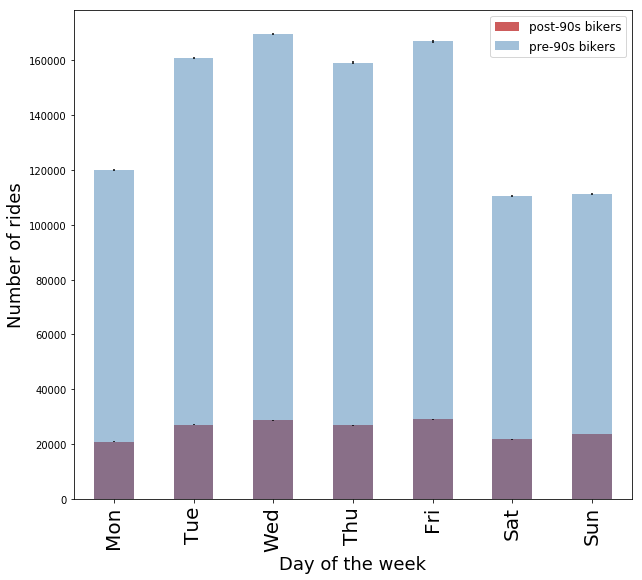

In [37]:
fig=pl.figure(figsize(10,9))

counts_po = data.date[data['birth year'] >=1990].groupby([data.date.dt.weekday]).count()
norm_po=1
error_po = np.sqrt(counts_po)
ax = ((counts_po) / norm_po).plot(kind="bar",color='IndianRed',  yerr=[((error_po) / norm_po, (error_po) / norm_po)], label='post-90s bikers')


counts_pr = data.date[data['birth year'] <1990].groupby([data.date.dt.weekday]).count()
norm_pr = 1
error_pr=np.sqrt(counts_pr)
((counts_pr) / norm_pr).plot(kind="bar", alpha=0.5, yerr=[((error_pr) / norm_pr, (error_pr) / norm_pr)], 
                           color='SteelBlue', label='pre-90s bikers')
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_ylabel ("Number of rides", fontsize = 18)
ax.set_xlabel ("Day of the week", fontsize = 18)
pl.legend(['post-90s bikers','pre-90s bikers'],fontsize=12)

## Figure 1b: Distribution of Citibike bikers by age in July 2016, absolute counts, with statistical errors

Note: These are absolute numbers. It is very hard to compare absolute numbers. Ratios (or proportions) are more ameable to comparison, so let's _normalize_ the distribution of pre-90s, and that of post-90s, i.e. devide them by the total number of rides for that generation. 
(Notice that i have to normalize the errorbars too!)


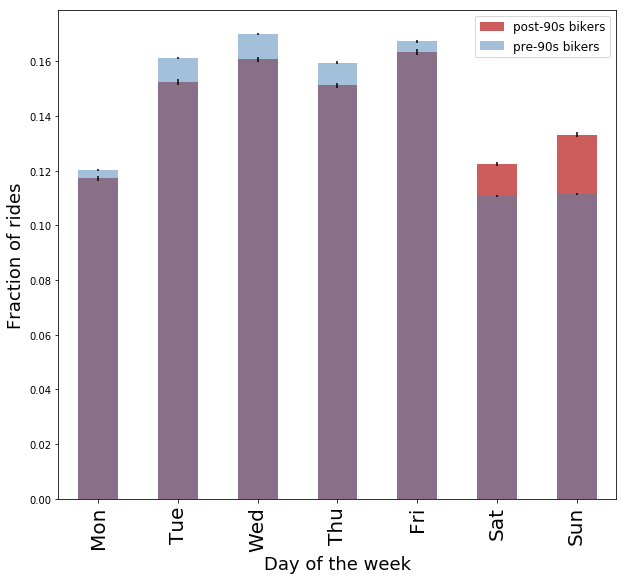

In [57]:
fig = pl.figure(figsize(10,9))

norm_po = counts_po.sum()
error_po = np.sqrt(counts_po)
((counts_po) / norm_po).plot(kind="bar", color='IndianRed',  
                           yerr=[((error_po) / norm_po, (error_po) / norm_po)], 
                           label='post-90s bikers')

norm_pr = counts_pr.sum()
ax = ((counts_pr) / norm_pr).plot(kind="bar", alpha=0.5, 
                                yerr=[((error_pr) / norm_pr, (error_pr) / norm_pr)], 
                                color='SteelBlue', label='pre-90s bikers')

ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
ax.set_ylabel ("Fraction of rides", fontsize=18)
ax.set_xlabel ("Day of the week", fontsize=18)

pl.legend(['post-90s bikers','pre-90s bikers'],fontsize=12)


## Figure 2: Distribution of Citibike bikers by in July 2016, normalized

## The fraction of pre-90s that bikes during the weekdays and the fraction that bikes during weekends, and the same for post-90s

In [58]:
week_pr = sum(counts_pr[:-2]) * 1.0 / norm_pr  #fraction of pre-90s riding on week days
weekend_pr = sum(counts_pr[-2:]) * 1.0 / norm_pr  #fraction of pre-90s riding on weekends
#error bar
eweek_pr = np.sqrt(sum(error_pr[:-2]**2)) / norm_pr  #error on fraction number of pre-90s riding on week days
eweekend_pr = np.sqrt(sum(error_pr[-2:]**2)) / norm_pr #error on fraction number of pre-90s riding on weekends

#same nomenclature as above
week_po = sum(counts_po[:-2]) * 1.0 / norm_po
weekend_po = sum(counts_po[-2:]) * 1.0 / norm_po
#error bar
eweek_po = np.sqrt(sum(error_po[:-2]**2)) / norm_po
eweekend_po = np.sqrt(sum(error_po[-2:]**2)) / norm_po

In [59]:
print("Pre-90s fraction: week:{0:.3f}, weekend:{1:.3f}, weekend error:{2:.3f}, weekend error:{3:.4f}"\
      .format(week_pr, weekend_pr, eweek_pr, eweekend_pr))
print("Post-90s fraction: week:{0:.3f}, weekend:{1:.3f}, weekend error:{2:.3f}, weekend error:{3:.4f}"\
      .format(week_po, weekend_po, eweek_po, eweekend_po))

Pre-90s fraction: week:0.778, weekend:0.222, weekend error:0.001, weekend error:0.0005
Post-90s fraction: week:0.745, weekend:0.255, weekend error:0.002, weekend error:0.0012


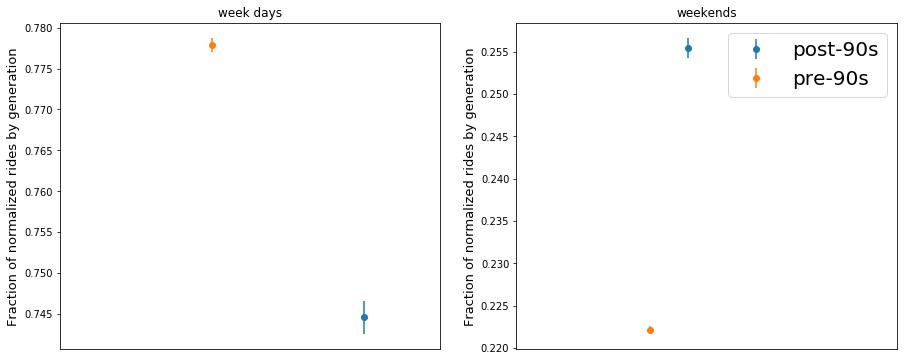

In [60]:
fig = pl.figure(figsize = (15, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.set_xticks([])
ax2.set_xticks([])

ax1.errorbar([0.4], [week_po], yerr=[eweek_po], fmt='o', label='post-90s')
ax1.errorbar([0.2], [week_pr], yerr=[eweek_pr], fmt='o', label='pre-90s')
ax1.set_xlim(0, 0.5)
ax2.errorbar([0.4], [weekend_po], yerr=[eweekend_po], fmt='o', label='post-90s')
ax2.errorbar([0.2], [weekend_pr], yerr=[eweekend_pr], fmt='o', label='pre-90s')
ax1.set_xlim(0, 0.5)
ax1.set_title("week days")
ax2.set_title("weekends")
ax2.set_ylabel("Fraction of normalized rides by generation", fontsize = 13)
ax1.set_ylabel("Fraction of normalized rides by generation", fontsize = 13)

pl.xlim(-0.5, 1.5)
pl.legend(fontsize = 20)

## Figure 3: Fraction of Citibike bikers(pre-90s, post-90s) in July 2016 for week days (left) and weekends (right)


In [61]:
di = weekend_po - weekend_pr
print ("difference between pre-90s and pre-90s on weekend: ", di)
    print("In accordance with Null Hypothesis")
else:
    print ("We must check the significance before we reject the Null Hypothesis")

difference between pre-90s and pre-90s on weekend:  0.0333808077834
We must check the significance before we reject the Null Hypothesis


## Is this difference statistically significant?
### The statistics is:
$z = \frac{(p_0 - p_1)}{SE} $

$p =\frac{p_0  n_0 + p_1  n_1}{n_0+n_1}$

$SE = \sqrt{ p  ( 1 - p )  (\frac{1}{n_0} + \frac{1}{n_1}) }$
### and in this notation
$p_0 = \frac{po_{\mathrm{weekend}}}{po_{\mathrm{total}}}$

and

$p_1 = \frac{pr_{\mathrm{weekend}}}{pr_{\mathrm{total}}}$

In [62]:
# defining the functions that calculate the statistics
# the lambda style definition is NOT APPROVED BY PEP8 and you should avoind it
# but I am putting it here since you may encounter it in your coding life.
# confront the equation in the markdown cell above with these function to understand as they work
def getp(p0, p1, n0, n1):
    p = (p0 * n0 + p1 * n1) / (n0 + n1)
    return p

def getse(p, n0, n1):
    se = np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1)) #standard error
    return se

def getzscore(p0, p1, s):
    zscore = (p0 - p1) / s
    return zscore

# calculations
p = getp(weekend_po, weekend_pr, norm_po, norm_pr)
SE = getse(p, norm_po, norm_pr)
z = getzscore(weekend_po, weekend_pr, SE)

print ("The z statistics is %.10f"%z)

The z statistics is 30.9816135711


## The largest number reported in z stats tables is (thpically) 3, which gives a p value
p < 0.0002, 
## which is smaller then my chosen $\alpha=0.05$ - so yes, it is statistically significant (by a lot!)
## We reject the Null Hypothesis.

## Check the robustness of the answer with another citibike dataset 
### we select the December 2016 data, since in winter, because of the cold weather, people may less likely to choose biking for commuting.

In [21]:
## download data
datestring = '201612'
getCitiBikeCSV(datestring)

file in place, you can continue


In [22]:
df_12 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df_12['date'] = pd.to_datetime(df_12['Start Time'])
df_12.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,date
0,528,2016-12-01 00:00:04,2016-12-01 00:08:52,499,Broadway & W 60 St,40.769155,-73.981918,228,E 48 St & 3 Ave,40.754601,-73.971879,26931,Subscriber,1964.0,1,2016-12-01 00:00:04
1,218,2016-12-01 00:00:28,2016-12-01 00:04:06,3418,Plaza St West & Flatbush Ave,40.675021,-73.971115,3358,Garfield Pl & 8 Ave,40.671198,-73.974841,27122,Subscriber,1955.0,1,2016-12-01 00:00:28
2,399,2016-12-01 00:00:39,2016-12-01 00:07:19,297,E 15 St & 3 Ave,40.734232,-73.986923,345,W 13 St & 6 Ave,40.736494,-73.997044,19352,Subscriber,1985.0,1,2016-12-01 00:00:39
3,254,2016-12-01 00:00:44,2016-12-01 00:04:59,405,Washington St & Gansevoort St,40.739323,-74.008119,358,Christopher St & Greenwich St,40.732916,-74.007114,20015,Subscriber,1982.0,1,2016-12-01 00:00:44
4,1805,2016-12-01 00:00:54,2016-12-01 00:31:00,279,Peck Slip & Front St,40.707873,-74.001670,279,Peck Slip & Front St,40.707873,-74.001670,23148,Subscriber,1989.0,1,2016-12-01 00:00:54


In [23]:
data_12 = df_12[['date', 'Birth Year']]
data_12.head()

,date,Birth Year
0,2016-12-01 00:00:04,1964.0
1,2016-12-01 00:00:28,1955.0
2,2016-12-01 00:00:39,1985.0
3,2016-12-01 00:00:44,1982.0
4,2016-12-01 00:00:54,1989.0


In [44]:
counts_po_12 = data_12.date[data_12['Birth Year'] >= 1990].groupby([data_12.date.dt.weekday]).count()
counts_pr_12 = data_12.date[data_12['Birth Year'] < 1990].groupby([data_12.date.dt.weekday]).count()

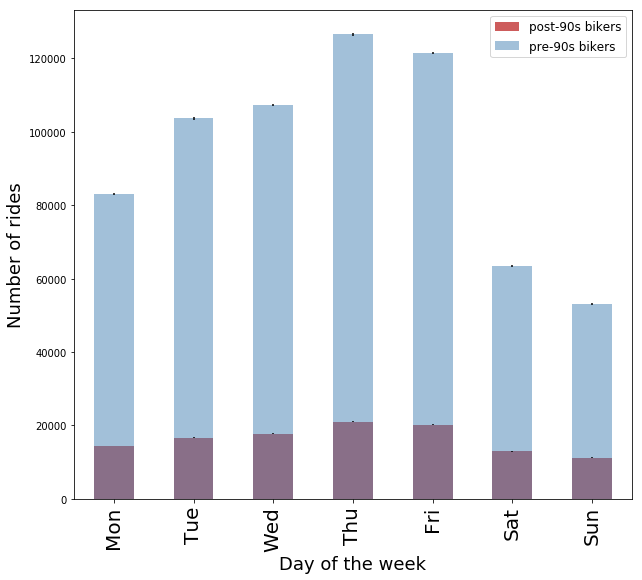

In [45]:
fig=pl.figure(figsize(10,9))

norm_po=1
error_po_12 = np.sqrt(counts_po_12)
ax = ((counts_po_12) / norm_po).plot(kind="bar",color='IndianRed',  yerr=[((error_po_12) / norm_po, (error_po_12) / norm_po)], label='post-90s bikers')

norm_pr = 1
error_pr_12=np.sqrt(counts_pr_12)
((counts_pr_12) / norm_pr).plot(kind="bar", alpha=0.5, yerr=[((error_pr_12) / norm_pr, (error_pr_12) / norm_pr)], 
                           color='SteelBlue', label='pre-90s bikers')
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_ylabel ("Number of rides", fontsize = 18)
ax.set_xlabel ("Day of the week", fontsize = 18)
pl.legend(['post-90s bikers','pre-90s bikers'],fontsize=12)

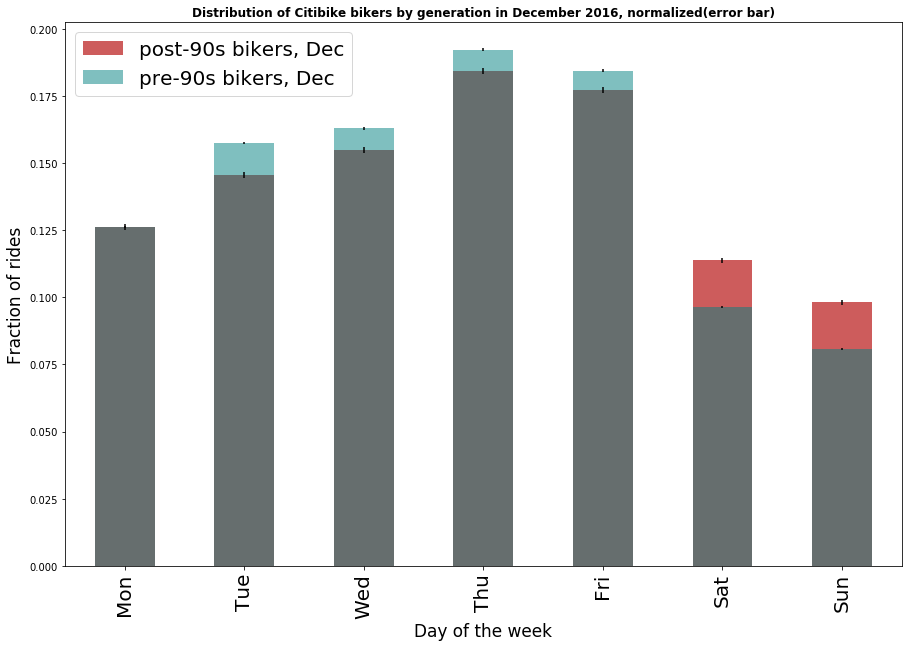

In [46]:
fig=pl.figure(figsize(15,10))

norm_po_12 = counts_po_12.sum()
error_po_12 = np.sqrt(counts_po_12)

((counts_po_12) / norm_po_12).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_po_12) / norm_po_12, (error_po_12) / norm_po_12)], label= 'post-90s bikers, Dec')

norm_pr_12 = counts_pr_12.sum()
error_pr_12 = np.sqrt(counts_pr_12)

ax = ((counts_pr_12) / norm_pr_12).plot(kind="bar",color='teal',  yerr=[
            ((error_pr_12) / norm_pr_12, (error_pr_12) / norm_pr_12)], label= 'pre-90s bikers, Dec', alpha = 0.5)

ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_ylabel ("Fraction of rides", fontsize = 17)
ax.set_xlabel ("Day of the week", fontsize = 17)

pl.legend(fontsize=20)
pl.title('Distribution of Citibike bikers by generation in December 2016, normalized(error bar)', weight = 'bold')

## Figure 4: Distribution of Citibike bikers by generation in December 2016, normalized

Pre-90s: week:0.823, weekend:0.177, weekend error:0.001, weekend error:0.001
Post-90s: week:0.788, weekend:0.212, weekend error:0.003, weekend error:0.001


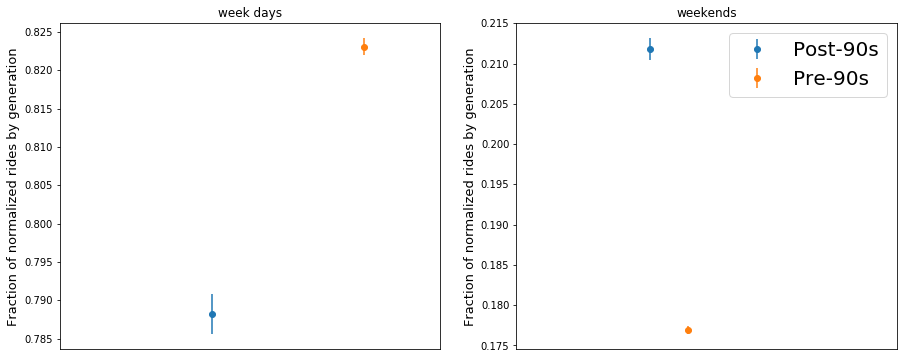

In [47]:
fig=pl.figure(figsize(15,6))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
ax1.set_xticks([])
ax2.set_xticks([])

week_po12 = sum(counts_po_12[:-2]) * 1.0 / norm_po_12
weekend_po12 = sum(counts_po_12[-2:])*1.0 / norm_po_12
eweek_po12 = np.sqrt(sum(error_po_12[:-2]**2)) / norm_po_12
eweekend_po12 = np.sqrt(sum(error_po_12[-2:]**2)) / norm_po_12

week_pr12 = sum(counts_pr_12[:-2]) * 1.0 / norm_pr_12
weekend_pr12 = sum(counts_pr_12[-2:]) * 1.0 / norm_pr_12
eweek_pr12 = np.sqrt(sum(error_pr_12[:-2]**2)) / norm_pr_12
eweekend_pr12 = np.sqrt(sum(error_pr_12[-2:]**2)) / norm_pr_12

print("Pre-90s: week:{0:.3f}, weekend:{1:.3f}, weekend error:{2:.3f}, weekend error:{3:.3f}"\
      .format(week_pr12, weekend_pr12, eweek_pr12, eweekend_pr12))
print("Post-90s: week:{0:.3f}, weekend:{1:.3f}, weekend error:{2:.3f}, weekend error:{3:.3f}"\
      .format(week_po12, weekend_po12, eweek_po12, eweekend_po12))

ax1.errorbar([0.2],[week_po12], yerr=[eweek_po12], fmt='o', label='Post-90s')
ax1.errorbar([0.4],[week_pr12], yerr=[eweek_pr12], fmt='o', label='Pre-90s')
ax1.set_xlim(0,0.5)
ax2.errorbar([0.2],[weekend_po12], yerr=[eweekend_po12], fmt='o', label='Post-90s')
ax2.errorbar([0.4],[weekend_pr12], yerr=[eweekend_pr12], fmt='o', label='Pre-90s')
ax1.set_xlim(0,0.5)
ax1.set_title("week days")
ax2.set_title("weekends")
ax2.set_ylabel("Fraction of normalized rides by generation", fontsize = 13)
ax1.set_ylabel("Fraction of normalized rides by generation", fontsize = 13)

pl.xlim(-0.5,1.5)
pl.legend(fontsize=20)

## Figure 5 Fraction of Citibike bikers by generation in December 2016 for week days (left) and weekends (right)

In [48]:
sp_stdev_12 = getse(getp(weekend_po12, weekend_pr12, norm_po_12, norm_pr_12), norm_po_12, norm_pr_12)
# print (sp_stdev_mw)
z12 = getzscore(weekend_po12, weekend_pr12, sp_stdev_12)
print ("The z statistics is %.10f"%z12)

The z statistics is 28.2463866580


### The z statstic is larger in the Summer and smaller in winter! Larger z means farther into the significance region

## The largest number reported in z stats tables is (thpically) 3, which gives a p value
p < 0.0002, 
## which is smaller then my chosen $\alpha=0.05$ - so yes, it is statistically significant (by a lot!)
## We reject the Null Hypothesis
## We proved the robustness of the answer given by analysis of July 2016 data.

## Lastly, let's check the effect size using formula：
$r = \frac{z}{\sqrt{(n_0+n_1)}}$
and

$h =  2 (\arcsin \sqrt{p_0} -  \arcsin \sqrt{p_1} )$



In [49]:
def r(z,n0,n1):
    r = z / np.sqrt(n0+n1)
    return r
def h(p0,p1):
    h = 2*(np.arcsin(np.sqrt(p0)) - np.arcsin(np.sqrt(p1)))
    return h

In [63]:
r06 = r(z, norm_po, norm_pr)
r12 = r(z12, norm_po_12, norm_pr_12)
print (r06, r12)

0.0285630972443 0.0321378655039


In [64]:
h06 = h(weekend_po, weekend_pr)
h12 = h(weekend_po12, weekend_pr12)
print (h06, h12)

0.0783394572513 0.0883683040165


## In all these cases we have SMALL EFFECT SIZE, and in both cases slightly smaller for the summer data.